In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import random
import time

In [ ]:
length = 7502

common_path = "/content/drive/MyDrive/yolobtp/oxfordtowncenter"

csv_file = '/content/drive/MyDrive/yolobtp/oxfordtowncenter/TownCentre-groundtruth.top.txt'
video_file = '/content/drive/MyDrive/yolobtp/oxfordtowncenter/TownCentreXVID.mp4'

print("Declaring path to raw data :")
print("="*50)
print("common_path :",common_path)
print("csv_file    :",csv_file)
print("video_file  :",video_file)

print()

train = common_path + "/" + "train"
test = common_path + "/" + "test"

#split Ratio
print("Split Ratio :")
print("="*50)
print("train path : {}".format(train))
print("test path  : {}".format(test))
print()
print("-Note")
print("--train : {} that is {} % of the whole data".format(len(os.listdir(train)) , len(os.listdir(train)) / length))
print("--test  : {} that is {} % of the whole data".format(len(os.listdir(test)) , len(os.listdir(test)) / length) )

print()
xml_path = common_path + "/" + "xmls"

#3076 , 3082 , 3086 are missing,so removed it from the train files.
print("="*50)
print("xml_path : {}".format(xml_path))
print()
print("-Note")
print("--No. of total XML files are {} == no. of train files.".format(len(os.listdir(xml_path))))

Declaring path to raw data :
common_path : /content/drive/MyDrive/yolobtp/oxfordtowncenter
csv_file    : /content/drive/MyDrive/yolobtp/oxfordtowncenter/TownCentre-groundtruth.top.txt
video_file  : /content/drive/MyDrive/yolobtp/oxfordtowncenter/TownCentreXVID.mp4

Split Ratio :
train path : /content/drive/MyDrive/yolobtp/oxfordtowncenter/train
test path  : /content/drive/MyDrive/yolobtp/oxfordtowncenter/test

-Note
--train : 3610 that is 0.4812050119968009 % of the whole data
--test  : 2501 that is 0.3333777659290856 % of the whole data

xml_path : /content/drive/MyDrive/yolobtp/oxfordtowncenter/xmls

-Note
--No. of total XML files are 3600 == no. of train files.


In [ ]:
pip install xmljson

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
import cv2
import numpy as np
from PIL import Image 
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import fromstring
from xmljson import parker
import seaborn as sns
import random

In [ ]:
def give_boxplot(gt , pred , tittle):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0, 0, 1, 1]) 
    data = [gt , pred]
    bp = ax.boxplot(data) 
    plt.title("Box plot of GT and pred for no of objects per frame of {}".format(tittle))
    plt.grid(True)
    plt.show()
    give_boxplot(no_of_boxes , np.ones(3087) , "random_model")

In [ ]:
def get_map(maps):
    return sum(maps) / len(maps)

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 68896, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 68896 (delta 0), reused 6 (delta 0), pack-reused 68889
Receiving objects: 100% (68896/68896), 577.17 MiB | 14.14 MiB/s, done.
Resolving deltas: 100% (48556/48556), done.


In [ ]:
%cd /content/models/research/
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/models/research
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.9 MB 6.7 MB/s 
     |████████████████████████████████| 352 kB 73.3 MB/s 
     |████████████████████████████████| 2.2 MB 49.2 MB/s 
     |████████████████████████████████| 23.4 MB 1.5 MB/s 
     |████████████████████████████████| 47.7 MB 66 kB/s 
     |████████████████████████████████| 90 kB 12.7 MB/s 
     |████████████████████████████████| 4.9 MB 49.0 MB/s 
     |████████████████████████████████| 1.1 MB 70.1 MB/s 
     |████████████████████████████████| 43 kB 2.9 MB/s 
     |████████████████████

In [ ]:
!wget https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
from inferenceutils import *

--2022-02-07 19:33:37--  https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2219 (2.2K) [text/plain]
Saving to: ‘inferenceutils.py.1’

inferenceutils.py.1 100%[===================>]   2.17K  --.-KB/s    in 0s      

2022-02-07 19:33:37 (48.9 MB/s) - ‘inferenceutils.py.1’ saved [2219/2219]



RuntimeError: ignored

ImportError: ignored

In [ ]:
%cd /content/drive/MyDrive/yolobtp/darknet 
!make
!chmod +x ./darknet

/content/drive/MyDrive/yolobtp/darknet
chmod +x *.sh


In [ ]:
%cd /content/drive/MyDrive/yolobtp/darknet 
!./darknet detector demo data/obj.data cfg/yolov3_custom.cfg backup/yolov3_custom_best.weights TownCentreXVID.mp4 -out_filename result.avi

/content/drive/MyDrive/yolobtp/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1

In [ ]:
!/content/drive/MyDrive/yolobtp/darknet/backup/yolov3_custom_best.weights

/bin/bash: /content/drive/MyDrive/yolobtp/darknet/backup/yolov3_custom_best.weights: Permission denied


In [ ]:
%cd /content/
import cv2
import numpy as np
CONF_THRESH, NMS_THRESH = 0.5, 0.5

# Load the network
net = cv2.dnn.readNetFromDarknet("/content/drive/MyDrive/yolobtp/darknet/cfg/yolov3_custom.cfg", '/content/drive/MyDrive/yolobtp/darknet/backup/yolov3_custom_best.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Get the output layer from YOLO
layers = net.getLayerNames()
output_layers = [layers[i[0] - 1] for i in net.getUnconnectedOutLayers()]

/content


In [ ]:
import os
import tqdm

In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
import os
test_images = ['/content/drive/MyDrive/yolobtp/oxfordtowncenter/train' + "/" + i for i in os.listdir('/content/drive/MyDrive/yolobtp/oxfordtowncenter/train')]
no_pred_boxes = []
time_per_frame = []
maps = []

for image_path in tqdm(test_images[:100]): 
  img = cv2.imread(image_path)
  height, width = img.shape[:2]

  blob = cv2.dnn.blobFromImage(img, 0.00392, (608, 608), swapRB=True, crop=False)
  net.setInput(blob)
  layer_outputs = net.forward(output_layers)

  class_ids, confidences, b_boxes = [], [], []

  start_time = start_time = time.time()
  for output in layer_outputs:
      for detection in output:
          scores = detection[5:]
          class_id = np.argmax(scores)
          confidence = scores[class_id]

          
          center_x, center_y, w, h = (detection[0:4] * np.array([width, height, width, height])).astype('int')

          x = int(center_x - w / 2)
          y = int(center_y - h / 2)
          temp = [x, y, int(w), int(h)]
          
          b_boxes.append(temp)
          confidences.append(float(confidence))
          class_ids.append(int(class_id))

 
  indices = cv2.dnn.NMSBoxes(b_boxes, confidences, CONF_THRESH, NMS_THRESH).flatten().tolist()

  
  with open("/content/drive/MyDrive/yolobtp/darknet/data/obj.names", "r") as f:
      classes = [line.strip() for line in f.readlines()]
  colors = np.random.uniform(0, 255, size=(len(classes), 3))
  end_time = time.time()
  no_pred_boxes.append(len(indices))
  maps.append(get_map(confidences))
  time_per_frame.append(end_time - start_time)



100%|██████████| 100/100 [07:22<00:00,  4.43s/it]


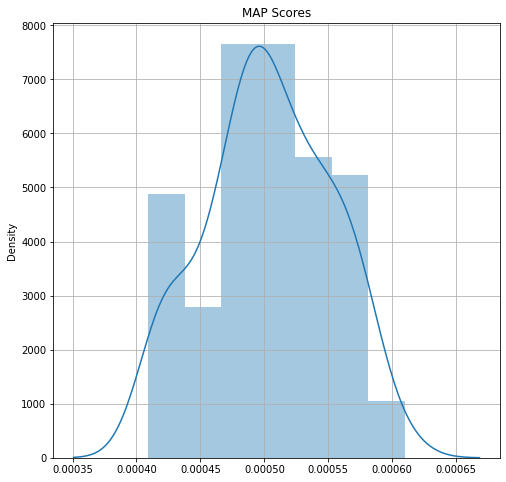

In [ ]:
plt.figure(figsize=(8,8))

plt.title("MAP Scores")
sns.distplot(maps)
plt.grid(True)
plt.show()

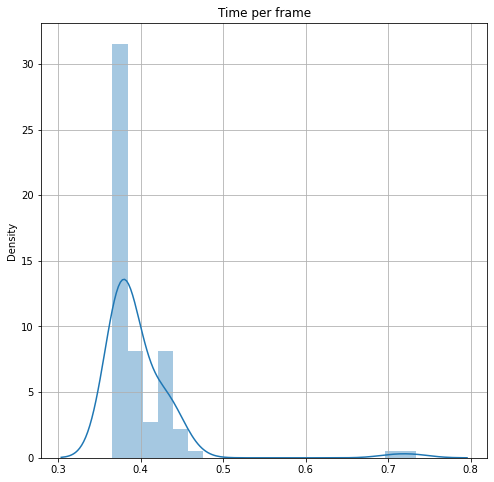

In [ ]:
plt.figure(figsize=(8,8))

plt.title("Time per frame")
sns.distplot(time_per_frame)
plt.grid(True)
plt.show()